<a href="https://colab.research.google.com/github/Jushef/Proyectos-ML-DL/blob/main/Unsupervised%20Learning/Dimensionality%20reduction/Clustering_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Clustering-Master 

Se trata de un proyecto para implementar y trabajar con varias técnicas de clustering. 

## Contenido

* [1. Introducción](#0)
* [2. Introducción - Cargar bibliotecas y conjunto de datos](#1)
    * [2.1. Cargar bibliotecas](#1.1)    
    * [2.2. Cargar el conjunto de datos](#1.2)
* [3. Análisis exploratorio de datos](#2)
    * [3.1. Estadísticas descriptivas](#2.1)    
    * [3.2. Visualización de datos](#2.2)
* [4. Preparación de los datos](#3)
    * [4.1. Limpieza de datos](#3.1)
    * [4.3.Transformación de datos](#3.2)  
* [5.Evaluación de algoritmos y modelos](#5)        
    * [5.1. Clustering k-Means](#5.1)
        * [5.1.1. Encontrar el número correcto de clusters](#5.1.1)
    * [5.2. Clustering Jerárquico (Clustering Aglomerativo)](#5.2)
        * [5.2.1. Visualización de la jerarquía](#5.2.1) 
    * [5.3. Clustering por Propagación de Afinidad](#5.3)
        * [5.3.1 Visualización del cluster](#5.2.1) 
    * [5.4. Clustering DBSCAN](#5.4)
        * [5.3.1 Encontrar los parámetros adecuados](#5.4.1) 

<a id='0'></a>
# 1. Introducción

La agrupación puede servir para comprender mejor los datos a través de la lente de las categorías aprendidas de las variables continuas. También permite categorizar automáticamente nuevos objetos según los criterios aprendidos. Alternativamente, los clusters pueden utilizarse para representar grupos como prototipos, utilizando, por ejemplo, el punto medio de un cluster como los mejores representantes de la agrupación aprendida. 

En este cuaderno jupyter, veremos las siguientes técnicas de clustering:
1. K-means
2. Clustering jerárquico (clustering aglomerativo)
3. Propagación de afinidad 



<a id='1'></a>
# 2. Primeros pasos - Cargar los datos y los paquetes de Python

<a id='1.1'></a>
## 2.1. Carga de los paquetes python

In [1]:
# Carga de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

# Importar paquetes de modelos 
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


# Otros paquetes y funciones de ayuda
import matplotlib.ticker as ticker
from itertools import cycle

<a id='1.2'></a>
## 2.2. Cargar los datos

In [2]:
# cargar conjunto de datos
dataset = read_csv('/content/Data_MasterTemplate.csv',index_col=0)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Análisis exploratorio de datos

<a id='2.1'></a>
## 3.1. Estadísticas descriptivas

In [5]:
# shape
dataset.shape

(4804, 30)

In [6]:
# consultar los datos
set_option('display.width', 100)
dataset.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805


In [7]:
# describir los datos
set_option('precision', 3)
dataset.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
count,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,363.000,...,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,2741.000,4804.000,4804.000
mean,86.769,49.659,49.107,85.482,56.697,61.735,21.653,24.984,46.368,64.897,...,23.724,20.737,49.960,55.961,62.209,64.418,27.193,53.323,50.767,41.697
std,53.942,22.564,55.020,79.085,34.663,31.714,10.074,10.611,32.733,5.768,...,20.988,7.630,19.769,34.644,32.627,62.920,11.973,37.647,17.040,19.937
min,25.140,8.713,0.828,17.463,9.247,17.566,6.842,11.699,11.018,49.090,...,2.595,8.041,16.204,13.287,14.521,5.175,11.210,9.846,30.748,17.317
25%,51.192,34.079,3.900,37.407,26.335,31.820,14.910,15.420,22.044,62.250,...,8.037,15.031,35.414,29.907,34.328,23.498,17.434,18.959,38.062,27.704
50%,63.514,42.274,23.316,58.437,53.048,56.942,18.578,20.563,29.521,66.586,...,14.147,18.643,46.735,39.824,55.715,42.924,21.556,45.207,42.782,32.706
75%,122.906,66.816,84.007,112.996,76.488,91.688,24.650,34.927,75.833,69.143,...,36.545,25.403,68.135,80.767,92.557,73.171,38.996,76.966,65.076,58.165
max,251.981,112.421,231.260,411.110,166.832,128.680,63.698,50.400,117.973,75.261,...,85.300,45.841,98.030,146.564,141.280,286.330,60.016,150.525,107.010,90.188


<a id='2.2'></a>
## 3.2. Visualización de datos

Observación de la correlación. Una mirada más detallada a los datos se realizará después de implementar los modelos de reducción de la dimensionalidad.

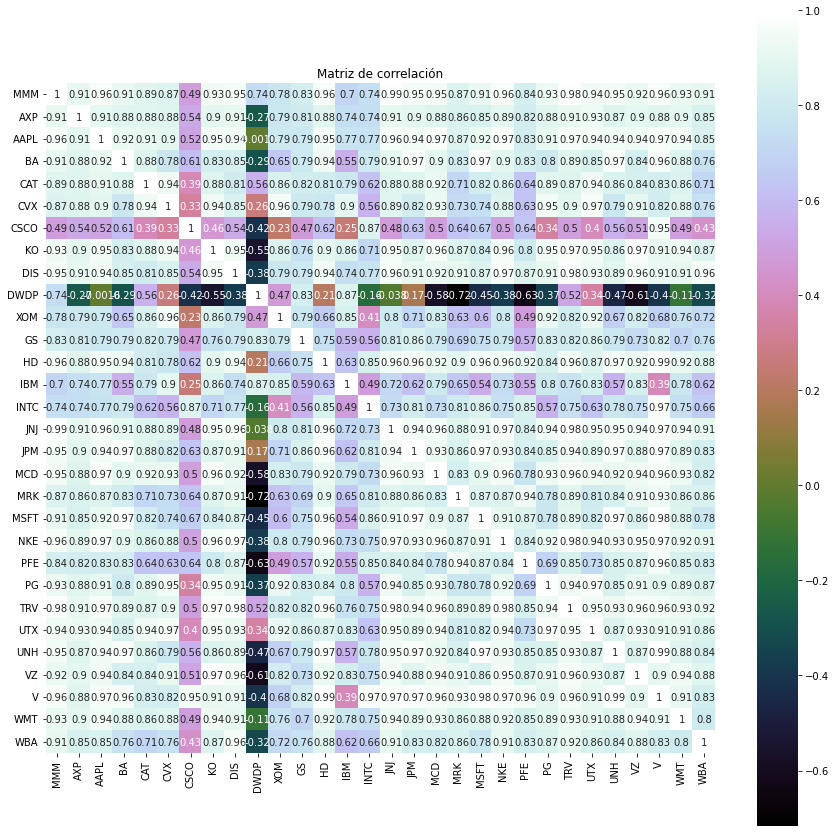

In [8]:
# correlación
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Matriz de correlación')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<a id='3'></a>
## 4. Preparación de datos

<a id='3.1'></a>
## 4.1. Limpieza de datos
Comprobación de los NAs en las filas, eliminarlos o rellenarlos con la media de la columna

In [9]:
# Comprobación de los valores nulos y eliminación de los mismos'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


En este paso nos deshacemos de las columnas con más de un 30% de valores perdidos. 

In [10]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

DWDP    0.924
V       0.429
MMM     0.000
JPM     0.000
WMT     0.000
VZ      0.000
UNH     0.000
UTX     0.000
TRV     0.000
PG      0.000
dtype: float64

In [11]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(4804, 28)

Dado que hay valores nulos, se elimina la raíz que contiene los valores nulos.

In [12]:
# Rellene los valores que faltan con el último valor disponible en el conjunto de datos. 
dataset=dataset.fillna(method='ffill')

dataset.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.650,14.561,21.582,43.004,16.984,23.522,23.862,...,38.135,4.701,16.747,32.228,20.159,21.319,5.841,22.564,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.610,14.372,21.582,40.577,17.041,24.900,23.405,...,36.846,4.445,16.122,31.596,19.890,20.446,5.766,21.834,45.566,20.907
2000-01-05,30.122,33.959,3.280,28.474,14.914,22.049,40.895,17.228,25.782,24.569,...,37.235,4.702,16.416,31.326,20.086,20.255,5.753,22.564,44.503,21.097
2000-01-06,31.877,33.959,2.996,28.553,15.459,22.903,39.782,17.210,24.900,25.959,...,35.989,4.678,16.973,32.438,20.122,20.998,5.964,22.449,45.127,20.527
2000-01-07,32.510,34.434,3.138,29.382,15.962,23.306,42.129,18.342,24.506,25.883,...,36.460,4.678,18.123,35.024,20.922,21.831,6.663,22.283,48.535,21.052


<a id='3.2'></a>
## 4.2. Transformación de datos

En este paso preparamos los datos para la agrupación.

In [13]:
# Calcule la rentabilidad porcentual media anual y las volatilidades en un periodo teórico de un año
returns = dataset.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = dataset.pct_change().std() * np.sqrt(252)
data = returns
# formatear los datos como un array numpy para introducirlos en el algoritmo K-Means
#data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

Todas las variables deben estar en la misma escala antes de aplicar el PCA, de lo contrario una característica con valores grandes dominará el resultado. A continuación utilizo StandardScaler en scikit-learn para estandarizar las características del conjunto de datos en la escala de la unidad (media = 0 y varianza = 1).

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)

# resumir los datos transformados
rescaledDataset.head(2)
X=rescaledDataset
X.head()

,Returns,Volatility
MMM,0.059,-1.010
AXP,-0.075,1.115
AAPL,3.176,2.043
BA,1.222,0.184
CAT,0.811,0.553


Los parámetros a agrupar son los índices y las variables utilizadas en la agrupación son las columnas. Por lo tanto, los datos están en el formato correcto para ser alimentados a los algoritmos de clustering.

<a id='4'></a>
# 5. Evaluar algoritmos y modelos

Veremos la implementación y visualización de las siguientes técnicas de clustering. 

1. KMeans
2. Clustering jerárquico
3. Clustering de Propagación de Afinidad


<a id='5.1'></a>
## 5.1. Agrupación K-Means


k-Means es el algoritmo de agrupación más conocido y fue propuesto por primera vez por Stuart Lloyd en los laboratorios Bell en 1957. 

El algoritmo encuentra K centros y asigna cada punto de datos exactamente a un clúster con el objetivo de minimizar la varianza dentro del clúster (llamada inercia). Normalmente utiliza la distancia euclidiana, pero también se pueden utilizar otras métricas. k-Means asume que los clusters son esféricos y de igual tamaño e ignora la covarianza entre las características.

El problema es difícil desde el punto de vista computacional (np-difícil) porque hay $𝐾_{N}$ formas de dividir las $N$ observaciones en $K$ clusters. El algoritmo iterativo estándar proporciona un óptimo local para un $K$ dado y procede como sigue:
1. Definir aleatoriamente los centros de los clusters y asignar los puntos al centroide más cercano
2. Repetir: 
    1. Para cada cluster, calcular el centroide como la media de las características
    2. Asignar cada observación al centroide más cercano
3. Convergencia: las asignaciones (o la variación dentro del cluster) no cambian

In [15]:
nclust=6

In [16]:
# Ajuste con k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=6)

En el código anterior, primero, importamos el paquete KMeans de scikit-learn e inicializamos un modelo k-means. A continuación, ajustamos este modelo a los datos utilizando la función .fit(). El resultado es un conjunto de etiquetas. Podemos extraer las etiquetas utilizando el siguiente código:

En el siguiente paso extraemos los parámetros importantes de la agrupación de k-means

In [17]:
centroids, assignments, inertia = k_means.cluster_centers_, k_means.labels_, k_means.inertia_

In [18]:
# Extracción de etiquetas 
target_labels = k_means.predict(X)

# Impresión de las etiquetas
target_labels

array([0, 2, 4, 1, 1, 0, 2, 3, 5, 3, 2, 5, 3, 2, 0, 2, 0, 3, 5, 1, 3, 3,
       5, 5, 1, 3, 3, 5], dtype=int32)

<a id='5.1.1'></a>
### 5.1.1. Encontrar el número óptimo de clusters

Normalmente, se utilizan dos métricas para evaluar un modelo K-means.

1. La suma de errores cuadrados (SSE) dentro de los clusters
2. Puntuación de la silueta.

El SSE dentro de los clusters se obtiene sumando la distancia al cuadrado entre cada punto de datos y su centroide más cercano. El objetivo es reducir el valor del error. La intuición detrás de esto es que querríamos que la distancia de cada punto de datos fuera lo más cercana posible al centroide. Si el error es pequeño, significa que los puntos de datos del mismo clúster son relativamente similares. A medida que aumente el número de centroides (clusters), el valor del error disminuirá. Por lo tanto, tendríamos que basarnos en la siguiente métrica para asegurarnos de que no estamos introduciendo demasiados centroides (clusters) en el modelo.

La puntuación de la silueta es una medida de la similitud del punto de datos con su propio clúster en comparación con otros clústeres. El valor va de -1 (peor puntuación) a 1 (mejor puntuación). Un valor negativo significaría que los puntos de datos están mal agrupados, mientras que los valores cercanos a 0 significarían que hay clusters superpuestos.

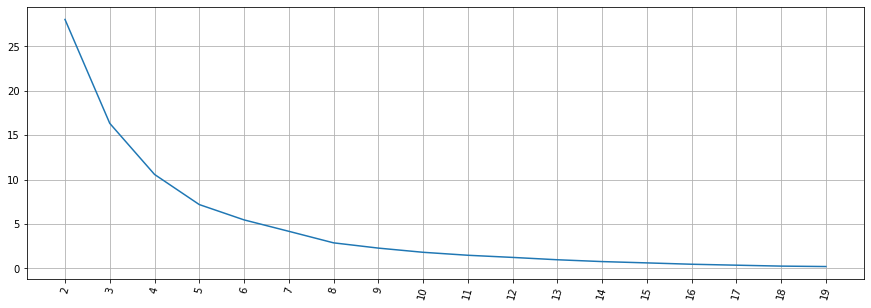

In [19]:
distorsions = []
max_loop=20

for k in range(2, max_loop):
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(X)
    distorsions.append(kmeans_test.inertia_)

    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

#### Puntuación de la silueta

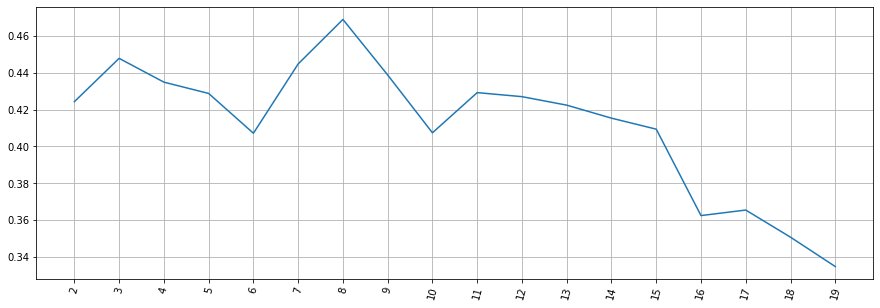

In [21]:
from sklearn import metrics

silhouette_score = []

for k in range(2, max_loop):
        kmeans_test = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans_test.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans_test.labels_, random_state=10))


fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

En el primer gráfico, Within Cluster SSE After K-Means Clustering, podemos ver que a medida que el número de clusters pasa de 3, la suma de errores cuadrados dentro de los clusters se estabiliza. En el segundo gráfico, Silhouette Score After K-Means Clustering, podemos ver que hay varias partes del gráfico en las que se aprecia un giro. Dado que no hay mucha diferencia en la SSE después de 7 clusters y que la caída en la puntuación de la silueta es bastante significativa entre 14 clusters y 15 clusters, utilizaría 14 clusters en mi modelo K-Means a continuación.

In [22]:
k_means.labels_

array([0, 2, 4, 1, 1, 0, 2, 3, 5, 3, 2, 5, 3, 2, 0, 2, 0, 3, 5, 1, 3, 3,
       5, 5, 1, 3, 3, 5], dtype=int32)

<a id='5.1.2'></a>
### 5.1.2. Visualización de clústeres

Visualizar cómo se forman los clusters no es una tarea fácil cuando el número de variables/dimensiones de su conjunto de datos es muy grande. Uno de los métodos para visualizar un cluster en un espacio bidimensional.

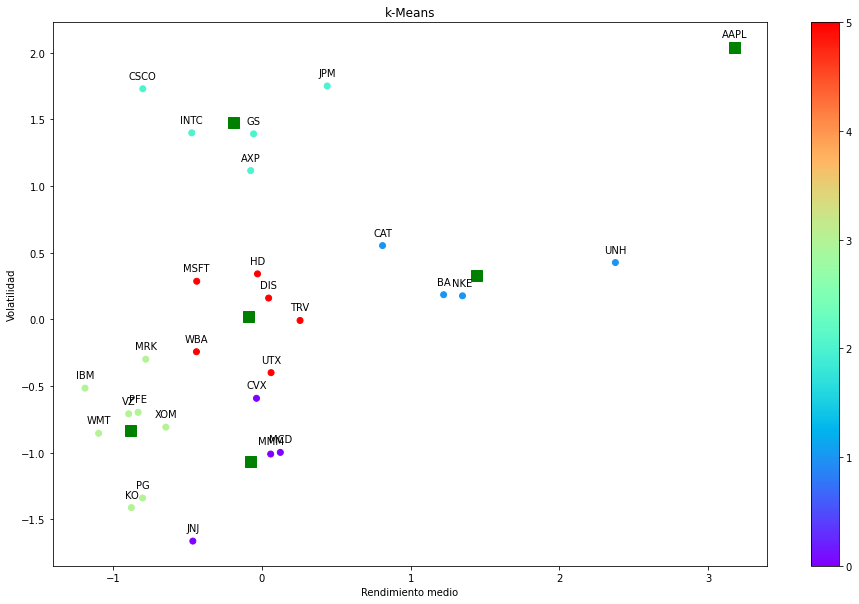

In [23]:
centroids = k_means.cluster_centers_
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c = k_means.labels_, cmap ="rainbow", label = X.index)
ax.set_title('k-Means')
ax.set_xlabel('Rendimiento medio')
ax.set_ylabel('Volatilidad')
plt.colorbar(scatter)

# zip une las coordenadas x e y en pares
for x,y,name in zip(X.iloc[:,0],X.iloc[:,1],X.index):

    label = name

    plt.annotate(label, # este es el texto
                 (x,y), # este es el punto a etiquetar
                 textcoords="offset points", # cómo colocar el texto
                 xytext=(0,10), # distancia del texto a los puntos (x,y)
                 ha='center') # la alineación horizontal puede ser a la izquierda, a la derecha o al centro
    
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

Comprobación de los elementos de cada grupo 

In [24]:
cluster_label = pd.concat([pd.DataFrame(X.index), pd.DataFrame(k_means.labels_)],axis = 1)
cluster_label.columns =['Empresa','Cluster']
cluster_label.sort_values(by=['Cluster'])

,Empresa,Cluster
0,MMM,0
5,CVX,0
16,MCD,0
14,JNJ,0
24,UNH,1
19,NKE,1
3,BA,1
4,CAT,1
15,JPM,2
10,GS,2


<a id='5.2'></a>
## 5.2. Clustering jerárquico (clustering aglomerativo)

Inicialmente, cada punto se considera como un clúster independiente y, a continuación, agrupa recursivamente los puntos en función de la distancia entre ellos. Los puntos se agrupan de forma que la distancia entre los puntos de un clúster sea mínima y la distancia entre los clústeres sea máxima. Las medidas de distancia más utilizadas son la distancia euclidiana, la distancia de Manhattan o la distancia de Mahalanobis. A diferencia del clustering de k-means, es un enfoque "ascendente".

Su principal ventaja sobre otros métodos de clustering es que no es necesario adivinar de antemano cuántos clusters puede haber. El clustering aglomerado asigna primero cada punto de datos a su propio cluster, y gradualmente fusiona los clusters hasta que sólo queda uno. A continuación, el usuario debe elegir un umbral de corte y decidir cuántos clústeres hay.

Consejo de Python: Aunque proporcionar el número de clusters no es necesario, Python proporciona una opción de proporcionar el mismo para un uso fácil y sencillo.

Aunque el clustering jerárquico no tiene hiperparámetros como k-Means, la medida de disimilitud entre clusters (en contraposición a los puntos de datos individuales) tiene un impacto importante en el resultado del clustering. Las opciones difieren como sigue:

- Enlace simple: distancia entre los vecinos más cercanos de dos clusters
- Enlace completo: distancia máxima entre los respectivos miembros de los clusters
- Media de los grupos
- Método de Ward: minimiza la varianza dentro del clúster


El uso de una métrica de distancia hace que la agrupación jerárquica sea sensible a la escala:

In [25]:
nclust = 4
model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
clust_labels1 = model.fit_predict(X)

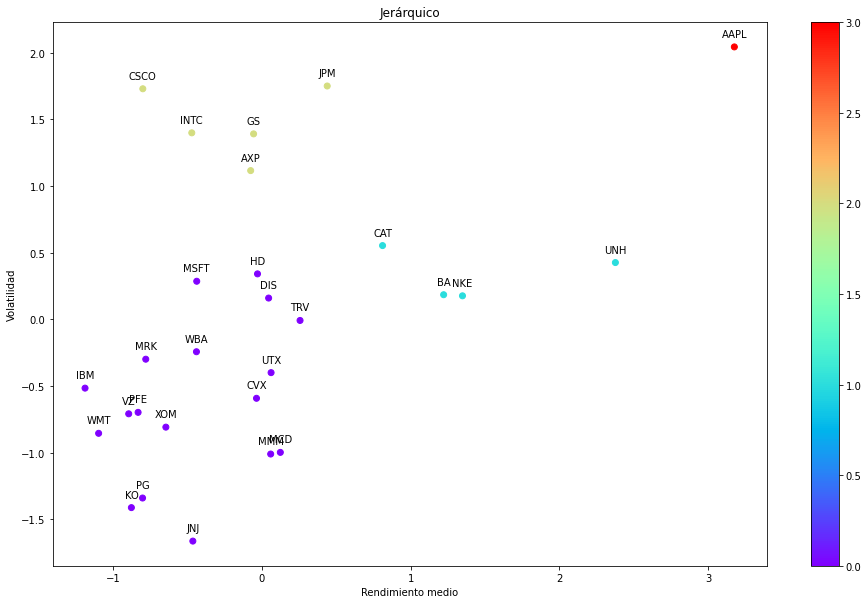

In [26]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels1, cmap ="rainbow")
ax.set_title('Jerárquico')
ax.set_xlabel('Rendimiento medio')
ax.set_ylabel('Volatilidad')
plt.colorbar(scatter)

# zip une las coordenadas x e y en pares
for x,y,name in zip(X.iloc[:,0],X.iloc[:,1],X.index):

    label = name

    plt.annotate(label, # este es el texto
                 (x,y), # este es el punto a etiquetar
                 textcoords="offset points", # cómo colocar el texto
                 xytext=(0,10), # distancia del texto a los puntos (x,y)
                 ha='center') # la alineación horizontal puede ser a la izquierda, a la derecha o al centro

En este caso, los resultados entre k-means y la agrupación jerárquica fueron bastante similares. Sin embargo, no siempre es así. En general, la ventaja de la agrupación jerárquica aglomerativa es que tiende a producir resultados más precisos. La desventaja es que el clustering jerárquico es más difícil de implementar y consume más tiempo y recursos que k-means.

<a id='5.2.1'></a>
### 5.2.1. Visualización : Construcción de un gráfico jerárquico / dendograma


El siguiente paso es buscar grupos de correlaciones mediante la técnica de agrupación jerárquica aglomerada. 
La clase de jerarquía tiene un método de dendrograma que toma el valor devuelto por el método de vinculación de la misma clase. El método de vinculación toma como parámetros el conjunto de datos y el método para minimizar las distancias. Usamos 'ward' como método ya que minimiza entonces variantes de distancias entre los clusters.

Linkage hace la agrupación real en una línea de código, y devuelve una lista de los clusters unidos en el formato $Z=[stock_1, stock_2, distancia, sample count]$

También hay diferentes opciones para la medición de la distancia. La opción que elegiremos es la medición de la distancia media, pero son posibles otras (ward, single, centroid, etc.).


In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

# Calcular el enlace
Z= linkage(X, method='ward')
Z[0]

array([20.        , 25.        ,  0.06407423,  2.        ])

La mejor manera de visualizar un algoritmo de aglomeración es mediante un dendograma, que muestra un árbol de clusters, siendo las hojas las poblaciones individuales y la raíz el cluster único final. La "distancia" entre cada conglomerado se muestra en el eje y, por tanto, cuanto más largas sean las ramas, menos correlacionados estarán dos conglomerados.

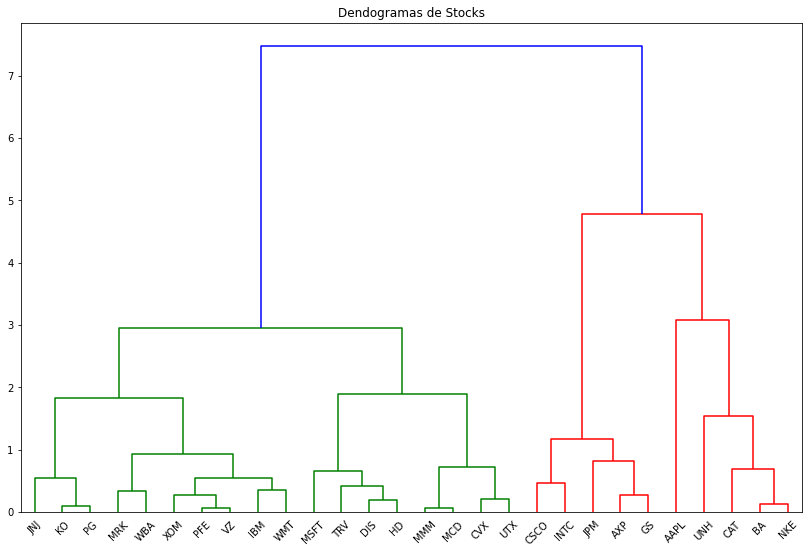

In [28]:
# Trazar Dendograma
plt.figure(figsize=(14, 9))
plt.title("Dendogramas de Stocks")
dendrogram(Z,labels = X.index)
plt.show()

Una vez que se ha formado un gran clúster, se selecciona la distancia vertical más larga sin que pase ninguna línea horizontal y se traza una línea horizontal a través de ella. El número de líneas verticales que pasa esta línea horizontal recién creada es igual al número de clusters.
A continuación, seleccionamos el umbral de distancia para cortar el dendrograma y obtener el nivel de clustering seleccionado. El resultado es el cluster etiquetado para cada fila de datos. Como se esperaba del dendrograma, un corte a 2.5 nos da 5 clusters.

In [29]:
distance_threshold = 2.5
clusters = fcluster(Z, distance_threshold, criterion='distance')
chosen_clusters = pd.DataFrame(data=clusters, columns=['cluster'])

chosen_clusters['cluster'].unique()
# array([4, 5, 2, 3, 1], dtype=int64)

array([2, 3, 5, 4, 1], dtype=int32)

#### Coeficiente de correlación cofenética

Es importante tener una idea de lo bien que funciona la agrupación. Una medida es el Coeficiente de Correlación Cofética, $c$ . Compara (correlaciona) las distancias reales entre pares de todas las muestras con las implícitas en la agrupación jerárquica. Cuanto más se acerque $c$ a $1$, mejor conservará el clustering las distancias originales. Por lo general, $c > 0.7$ se considera un buen ajuste del cluster. Por supuesto, es posible realizar otras comprobaciones de precisión.

In [30]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab

c, coph_dists = cophenet(Z, pdist(X))
c

0.6935580909376263

Según el dendograma anterior, los dos valores más correlacionados son PAYX y ADP. En primer lugar, ¿tiene esto sentido intuitivamente? Echando un vistazo rápido a PAYX y ADP, parece que ambos están en el negocio de los impuestos, nóminas, RRHH, jubilación y seguros. Así que tiene sentido que estén fuertemente correlacionadas. Vamos a trazarlas a continuación para ver visualmente lo bien que se correlacionan. Además, elijamos dos acciones que no estén bien correlacionadas en absoluto para compararlas con, por ejemplo, NVDA y WDC.

<a id='5.2.2'></a>
### 5.2.2. Comparar los tipos de enlace

La agrupación jerárquica permite conocer los grados de similitud entre las observaciones a medida que se van fusionando los datos. Un cambio significativo en la métrica de la similitud de una fusión a la siguiente sugiere que existía una agrupación natural antes de ese momento. El dendrograma visualiza las fusiones sucesivas como un árbol binario, mostrando los puntos de datos individuales como hojas y la fusión final como la raíz del árbol. También muestra cómo la similitud disminuye monótonamente de abajo a arriba. Por lo tanto, es natural seleccionar una agrupación cortando el dendrograma.

La siguiente figura ilustra el dendrograma para el conjunto de datos clásico de Iris con cuatro clases y tres características utilizando las cuatro métricas de distancia diferentes introducidas anteriormente. Se evalúa el ajuste de la agrupación jerárquica mediante el coeficiente de correlación cofenética que compara las distancias por pares entre los puntos y la métrica de similitud del clúster en el que se produjo una fusión por pares. Un coeficiente de 1 implica que los puntos más cercanos siempre se fusionan antes.

In [31]:
methods = ['single', 'complete', 'average', 'ward']
pairwise_distance = pdist(rescaledDataset)

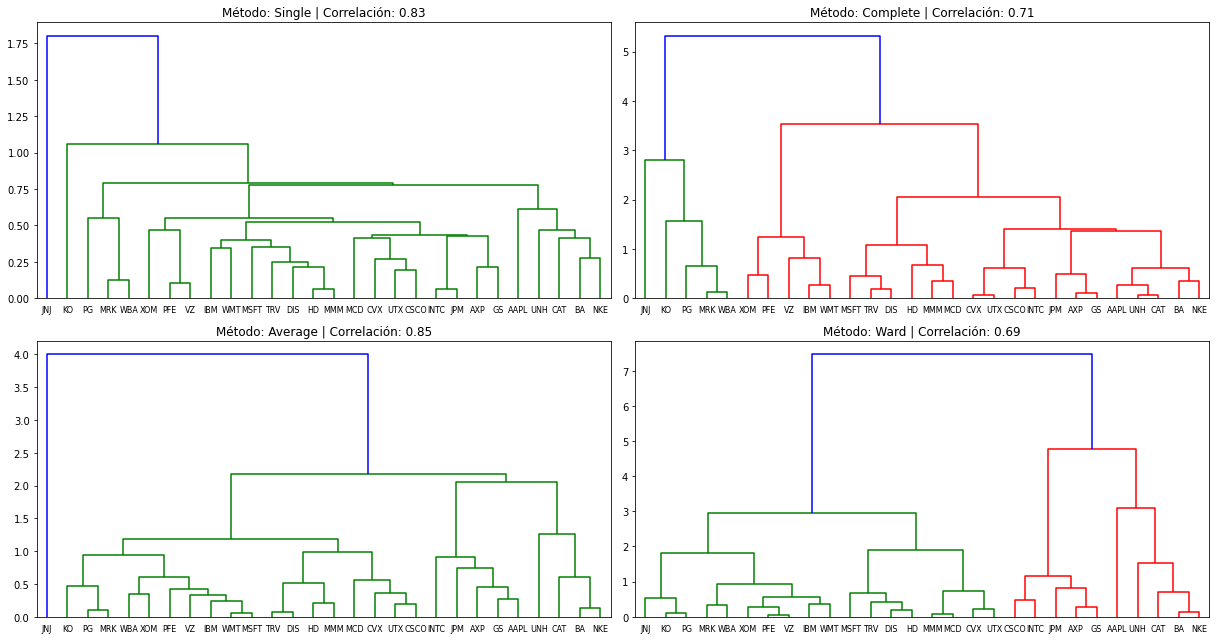

In [32]:
fig, axes = plt.subplots(figsize=(17, 9), nrows=2, ncols=2, sharex=True)
axes = axes.flatten()

for i, method in enumerate(methods):
    Z = linkage(X, method)
    c, coph_dists = cophenet(Z, pairwise_distance)
    dendrogram(Z, labels=X.index,
        orientation='top', leaf_rotation=0., 
        leaf_font_size=8., ax = axes[i])
    axes[i].set_title('Método: {} | Correlación: {:.2f}'.format(
                                                method.capitalize(), c))
    
fig.tight_layout()

Los diferentes métodos de vinculación producen diferentes "aspectos" del dendrograma, por lo que no podemos utilizar esta visualización para comparar los resultados entre métodos. Además, el método de Ward que minimiza la varianza dentro de los clústeres puede no reflejar adecuadamente el cambio en la varianza, sino la varianza total, lo que puede ser engañoso. En su lugar, otras métricas de calidad como la correlación cofenética o medidas como la inercia, si están alineadas con el objetivo general, son más apropiadas.


Los puntos fuertes de la agrupación jerárquica incluyen que:

* No es necesario especificar el número de conglomerados, sino que ofrece una visión sobre la agrupación potencial por medio de una visualización intuitiva.

* Produce una jerarquía de clusters que puede servir como taxonomía.

* Puede combinarse con k-means para reducir el número de elementos al inicio del proceso aglomerativo.

Los puntos débiles son:

* El alto coste en términos de computación y memoria debido a las numerosas actualizaciones de la matriz de similitud.

* Otro inconveniente es que todas las fusiones son finales, por lo que no se alcanza el óptimo global. 

* Además, la maldición de la dimensionalidad provoca dificultades con datos ruidosos y de alta dimensión.



<a id='5.3'></a>
## 5.3. Propagación de afinidad

No requiere que el número de clústeres se estime y se proporcione antes de iniciar el algoritmo. No hace ninguna suposición sobre la estructura interna de los puntos de datos

El algoritmo intercambia mensajes entre pares de puntos de datos hasta que surge un conjunto de ejemplares, en el que cada ejemplar corresponde a un clúster. El algoritmo de Propagación de Afinidad toma como entrada un número real s(k,k) para cada punto de datos k, denominado "preferencia". Los puntos de datos con valores grandes de s(k,k) tienen más probabilidades de ser ejemplares. El número de conglomerados está influido por los valores de las preferencias y el procedimiento de paso de mensajes.

In [33]:
ap = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
ap.fit(X)
clust_labels2 = ap.predict(X)

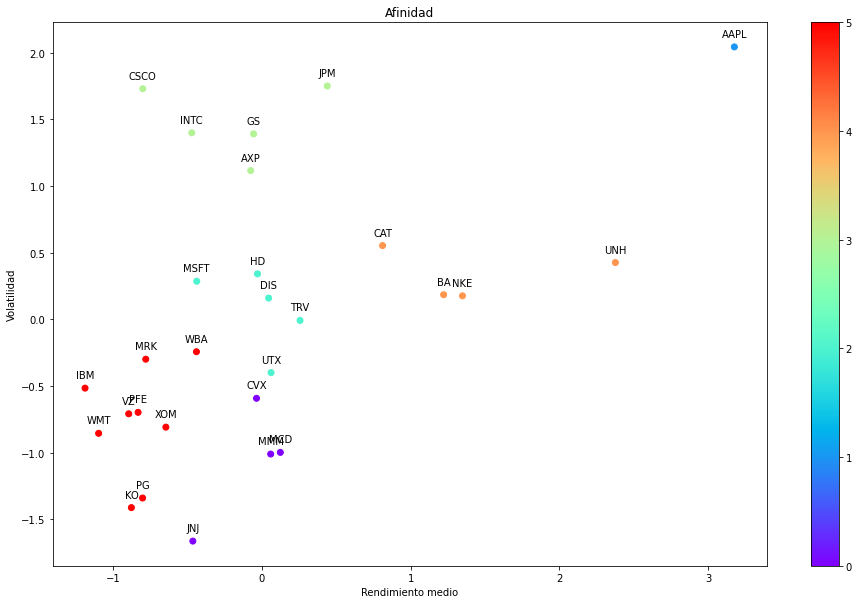

In [34]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels2, cmap ="rainbow")
ax.set_title('Afinidad')
ax.set_xlabel('Rendimiento medio')
ax.set_ylabel('Volatilidad')
plt.colorbar(scatter)

# zip une las coordenadas x e y en pares
for x,y,name in zip(X.iloc[:,0],X.iloc[:,1],X.index):

    label = name

    plt.annotate(label, # este es el texto
                 (x,y), # este es el punto a etiquetar
                 textcoords="offset points", # cómo colocar el texto
                 xytext=(0,10), # distancia del texto a los puntos (x,y)
                 ha='center') # la alineación horizontal puede ser a la izquierda, a la derecha o al centro

<a id='5.3.1'></a>
### 5.3.1 Visualización de clústeres

In [35]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)

Número estimado de racimos: 6


<Figure size 432x288 with 0 Axes>

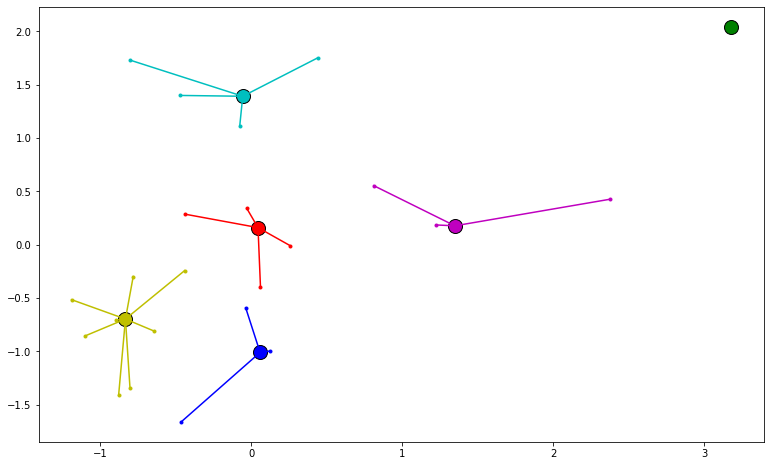

In [36]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
no_clusters = len(cluster_centers_indices)

print('Número estimado de racimos: %d' % no_clusters)
# Ejemplos de tramas

X_temp=np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(13,8))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show();

In [37]:
cluster_label = pd.concat([pd.DataFrame(X.index), pd.DataFrame(ap.labels_)],axis = 1)
cluster_label.columns =['Empresa','Cluster']
cluster_label.sort_values(by=['Cluster'])

,Empresa,Cluster
0,MMM,0
5,CVX,0
16,MCD,0
14,JNJ,0
2,AAPL,1
23,UTX,2
22,TRV,2
18,MSFT,2
8,DIS,2
11,HD,2
